# Time Series and Tabular Data

### Table of Conent

* Section 1. Introduction <br/>
<br/>
* Section 2. Financial Data Techniques
    * Section 2.1 Financial Data Feature Engineering Techniques
    * Section 2.2 Financial Data Cross Validation
    * Section 2.3 Financial Data Modeling Techniques<br/>
<br/>
* Section 3. Sports Data Modeling Techniques<br/>
* Section 4. Healthcare Data Techniques
    * Section 4.1 Healthcare Data Feature Engineering Techniques
    * Section 4.2 Healthcare Data Modeling Techniques<br/>
<br/>
* Section 5. Nature Science Data Techniques
    * Section 5.1 Nature Science Data Feature Engineering Techniques
    * Section 5.2 Nature Science Data Modeling Techniques<br/>
<br/>
* Section 6. Recommendation System and Other Data Techniques
    * Section 6.1 Recommendation System and Other Data Feature Engineering Techniques
    * Section 6.2 Recommendataion System and Other Data Modeling Techniques<br/>
<br/>
* Section 7. State of the Art: Transformer vs MLP Architecture for Time Series Data
    * Section 7.1 Transformer-based Models
    * Section 7.2 MLP-based Models
<br/><br/>
* Section 8. Conclusion<br/>
<br/>
* References
* Acknowledgement

### Section 1. Introduction

Over the past 2 years, Kaggle community has been able to learn a tremendous amount of knowledge through around 60 competitions. In fact, Kaggle has been the platform where people from diverse background come together and exchange state-of-the-art machine learning knowledge with each other, and Kaggle has been able to keep so many people up-to-date with current developement of AI models. In this report, we will only focus on time series and tabular data, as we would like to shed some light on how state-of-the-art language and computer vision models are applied to a more traditional type of data. We will be discussing some interesting feature engineering and modeling techniques of various outperformers of competitions applied to time series and tabular data, as the goal of the AI-report competition is to summarize what the Kaggle community has learned over the past 2 years. As the most Kaggle's tabular/time series data competitions focus on supervised learning, we will focus on the setting where we have one target variable and multiple independent variables by the definition of supervised learning. The links to the competitions and their datasets can be found in the reference section if the audience is interested in learning more about certain competitions after reading our report.<br/> 
<br/>
We have been witnessing some very interesting feature engineering techniques applied in several natural science data competitions, such as dimension reduction techniques applied to cell data in the "Open Problems - Multimodal Single-Cell Integration" competition and three dimensional representation of proteins in the "Novozymes Enzyme Stability Prediction" competition. While in some fields such as healthcare and nature science, more modern machine learning techniques, such as transformer-based models, graph neural networks and EdgeConv, are being applied, LightGBM remains the main stream model in some other fields such as finance, sports and recommendation system. In the following sections, whenever we encounter a model we have not yet discussed, we will describe the model briefly using plain and understandable language for the audience who is relatively new to the exciting field of machine learning and provide readers a more holistic picture about which models could be applied to what kind of datasets. In addition, we will discuss the intuitions and reasoning behind some feature engineering and modeling techniques. To conlude, we will discuss some state-of-the-art machine learning models developed in academia for time series data, which are not yet utilized in the winning strategies of Kaggle competitions, to add the last piece to the puzzle. We will explain some of the novel models using plain language for the broad audience and shed some light on why they are not yet deployed by the competitions' outperformers. <br/>


### Section 2. Financial Data Techniques

##### Section 2.1 Financial Data Feature Engineering Techniques

The first data type we will discuss is financial data. Most financial data competitions over the past 2 years involve predicting subsequent price returns or volatilities. "American Express - Default Prediction" is the only exception. In one of the winning strategies of that competition, for categorical data, functions such as mean, standard deviation, sum and last are applied to onehot-coded time-series features within the lookback window (6). For numeric features, similar functions are applied to raw, differenced, user-based ranked and month-based ranked numeric features. In another winning strategy, number of unique observations, median, exponential weighted moving average, flag for monotonic increasing, mode, top outlier and bottom outlier for time series data are used as additional features (7). All those created features are used to capture recent development of numeric/categorical predictors. Lags for differencing range from 1 to 11 and normalization is applied to all features.

Let us now discuss the more common type of financial data competition, namely price/volatility prediction. In one of the winning strategies of the "Optiver Realized Volatility Prediction" competition, by observing the average number of time-ids per day, one can gauge how the volatility data is generated by knowing the trading hours (1). By applying adversarial validation, for features which change significantly over time, ranks within the same time-id block are used to mitigate the effect of outliers. Log function is applied to features which have large skew. One interesting feature engineering technique deployed by the winning model is to use the realized volatilities of the same stock when the market had similar prices, volatilities and trading volumes and the realized volatilities from similar stocks (i.e. highly correlated with the target stock) with similar prices and volumes as additional predictors. The success of those predictors shows that similar financial environments tend to cause similar volatility movements. In the "G-Research Crypto Forecasting" competition, even though a wide range of diverse data is provided by the host, one winning strategy is to only use "Close" prices (2). In addition, that strategy calculates the differences between individual currency changes and the average change across currencies within the lookback window and the differences between the current currency value and the moving average of its own values within the lookback window as additional features. This shows cryptocurrencies' overall market movement tends to have an impact on individual currencies.

In the "Ubiquant Market Prediction" competition, average values of those predictors which are highly correlated with the target variable within a time block are used as additional features in one of the winning strategies (4). The effect of features is validated through cross validation techniques such as PurgedGroupTimeSeries and TimeSeriesSplit. When dealing with financial data, it is important to avoid look-ahead bias when performing cross validation. Finally, "JPX Tokyo Stock Exchange Prediction" showcases the limited effectiveness of machine learning models in predicting stock price returns. One of the winning strategies uses previous day's returns and expected dividends as the only features to rank stocks and no ML models is employed (5).

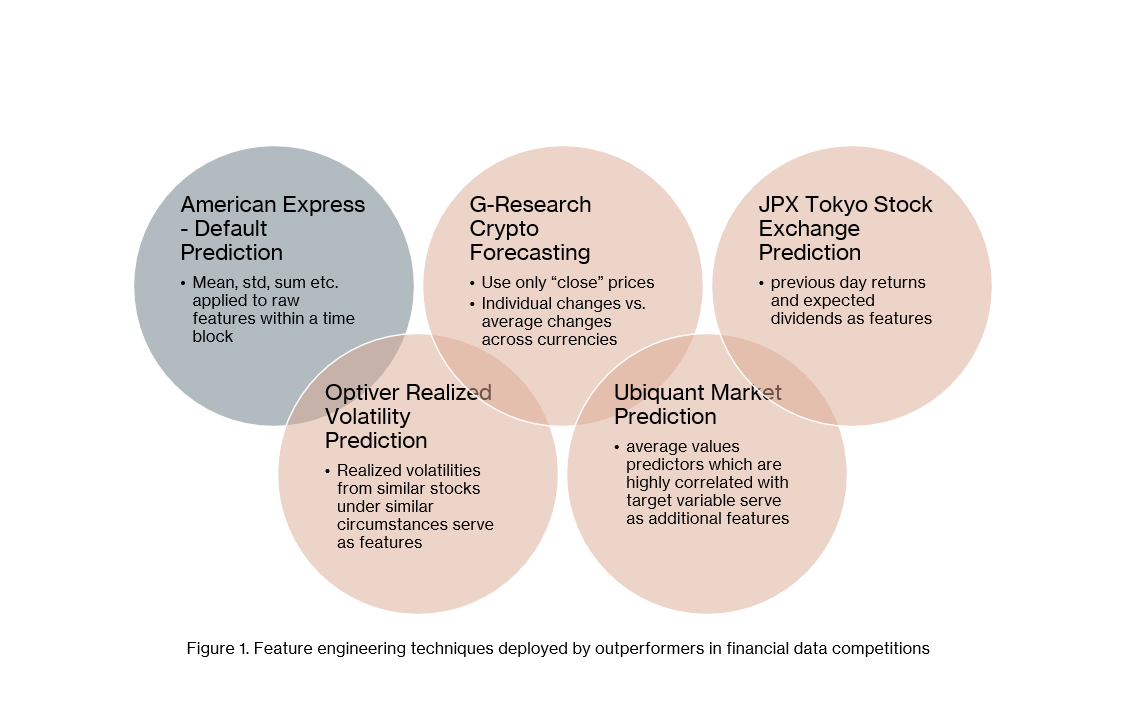

##### Section 2.2 Financial Data Cross Validation

When analyzing financial data, cross validation is used not only to filter for relevant features, but also to tune hyperparameters of the model used. In (7) ("American Express - Default Prediction"), five fold cross validation is used while tracking ROC AUC (true positive rate vs false positive rate). Based on LightGBM, zero importance features are dropped. LightGBM will be introduced in the next subsection. Then a technique called stepped hierarchical permutation importance is applied: 300 initial features are chosen and one loops over all other feature subsets (the orders of feature subsets are permuted from run to run). In each run, features with negative feature importance are dropped and a new subset is then added. In this way, features which contribute less to explaining the variance in target variables can be dropped more discretely. Finally, forward feature selection is applied to reduce the number of features by checking whether adding a subset of features would enhance the ROC AUC.

Switching to return/volatility competitions, time series CV plays an important role in "Optiver Realized Volatility Prediction" competition (1). In the "G-Research Crypto Forecasting" competition, the winners observe the CV score variances plotted against hyperparameters. If the CV score is too noisy, one could try different seeds or employ more folds to obtain more stable CV scores (2). In the "Ubiquant Market Prediction" competition, CV is also used to select hyperparameters of the models (4). KFold and GroupKFold are deployed for training the model and early stopping is applied.

##### Section 2.3 Financial Data Modeling Techniques

In financial time series competitions, LightGBM seems to be prevalent. In the competition "American Express - Default Prediction", one of the winning strategies uses an ensemble of LightGBM, GRU and DNN (6). Another winning team uses a blend of DART, LightGBM and Catboost (7). DART, LightGBM and Catboost are all variants of gradient boosting machines, which involve adding weak tree learners to explain the residuals which are not explained by preceding weak tree learners. Gradient boosting machine has been one of the best off-the-shelf models in recent years due to its abilities in handling different types of data, selecting features, handling outliers and quantifying feature importances. On the other hand, GRU is a machine learning model designed to handle sequence data which involves using past observations to explain the current ones. The success of ensemble of LightGBM and GRU showcases how well those 2 different types of models complement each other. The "Optiver Realized Volatility Prediction" competition's winning strategy is a blend of LightGBM, 1D-CNN and MLP (multi-layer perceptron) (1), while the winners of "G-Research Crypto Forecasting" employed LightGBM (2, 3) and "Ubiquant Market Prediction" competition employed a blend of LightGBM and TABNET (4). CNN (convolutional neural network) was originally designed for inferring content from graphic data due to is ability in summarizing various areas in graphical data. TabNet applies sequential attention to determine the most effective feature at each decision step (see 26), while attention is also a sequence model just like GRU, but it is divided into 2 separate stages, namely the encoding stage and the decoding stage (see 27). Attention model incorporates more information than GRU as it takes all hidden states from the encoding stage into account. It is fascinating to see that a machine learning sequential model has similar performance as a gradient boosting model, indicating the feature engineering part of GBM is able to incorporate past information very well.

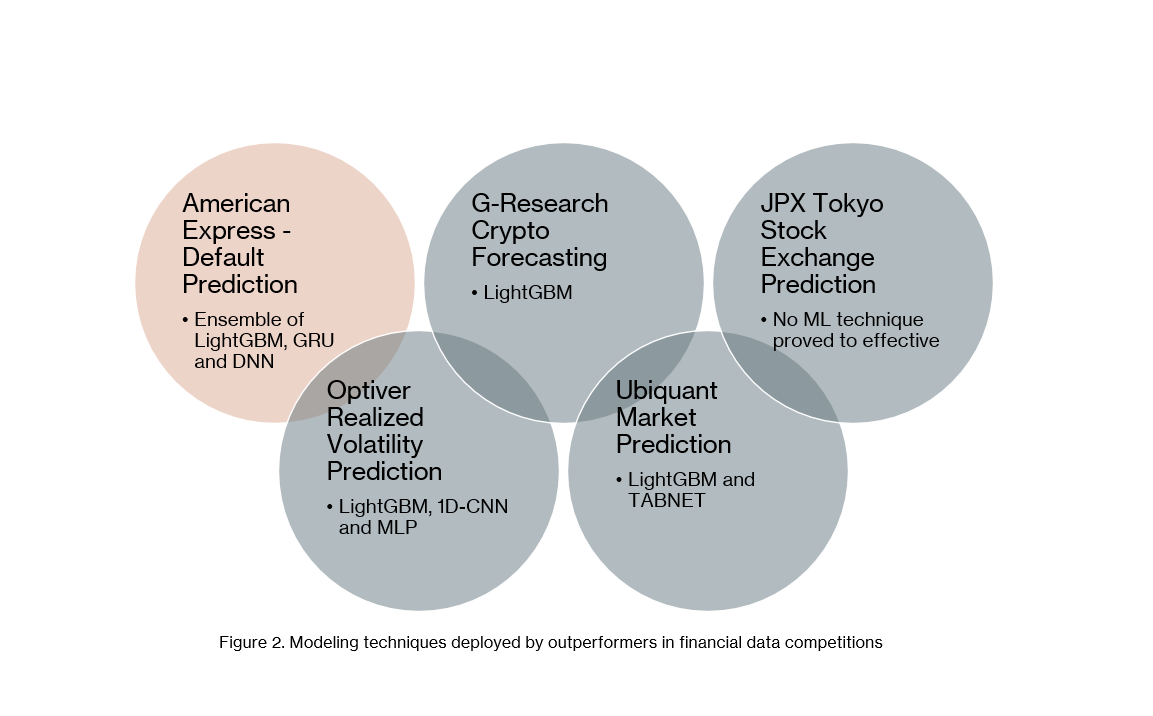

### Section 3. Sports Data Modeling Techniques

In the world of sport data, we have seen fewer creative feature engineering techniques being created in the past years. Gradient boosting is still the dominant technique in the most competitions with the following exception. In the "MLB PLayer Digital Engagement Forecasting" competition, dense layers and residual blocks are used to create embedding vectors before GRU is applied (8). Normalization of features and LSTM didn't help. In residual blocks, one hidden layer is not only fed into next hidden layer, but also fed into the layer 2 to 3 layers away. From a conceptual perspective, it is similar to gradient boosting, which attempts to estimate residuals. The success of GRU model in this competition demonstrates the effectiveness of relatively simple machine learning models over gradient boosting models when dealing with sequential data in sports. In the "March Machine Learning Mania 2022", a LightGBM model is deployed before overriding 3 teams' predictions manually based on subjective evaluations (9). In its 2023 version, standard features such as field goals made/attempted, rebounds, assists, point differences, win ratios over the past 14 days and teams' seeds are employed and XGB (also a variant of gradient boosting) is deployed to win the competition (10).

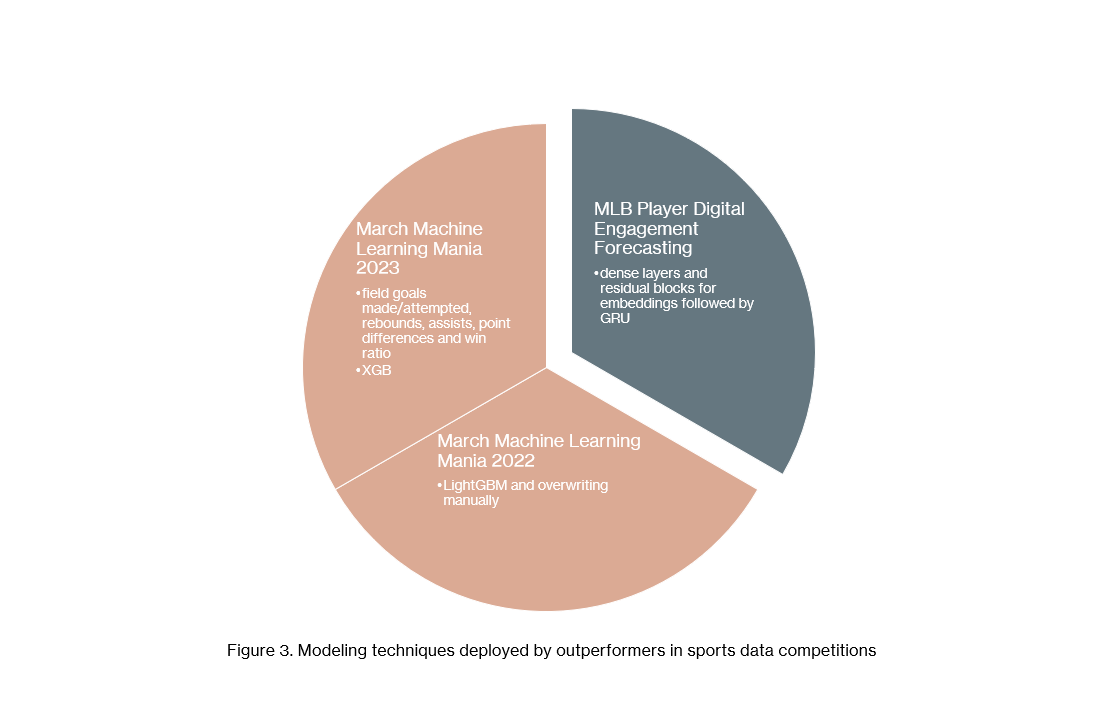

### Section 4. Healthcare Data Techniques

##### Section 4.1 Healthcare Data Feature Engineering Techniques

In recent healthcare data competitions, we have seen some interesting feature engineering techniques being applied. In one of the winning strategies of the "Google Brain - Ventilator Pressure Prediction" competition, important latent variables such as target pressure, pressure decay parameter and pressure multiplicator factor are calibrated to form the predictions (12). In the "AMP®-Parkinson's Disease Progression Prediction" competition, Blood test results are not used by the winners. Instead, visit month, forecast horizon, target prediction month, indicator whether blood was taken during the visit, indicator whether parent visit occured on 6th, 18th and 48th month and the count of previous "non-annual" visits (6th and 18th) prove to be strong predictors (13). In another Parkinson's Disease related competition "Parkinson's Freezing of Gait Prediction", features such as AccV, AccML and AccAP (acceleration detected by a lower-back sensor on three axes: V for vertical, ML for mediolateral, AP for anteroposterior) in the Tdscfog (freezing of gait data collected in the lab) dataset are combined into a matrix after being padded and then reshaped (14). Similar operations are done on features such as StartHesitation, Turn and Walking data. Tdscfog data is not used to train Defog (freezing of gait data collected at home), and Defog data is not used to train Tdcsfog. Daily, events, subjects and tasks datasets are not used. We see that while healthcare data competitions might provide us vast amount of data to work with, most winning strategies do not use all the data available. They instead select the most effective data to work with, so dataset selection is one of the most important skills to master when dealing with healthcare data.

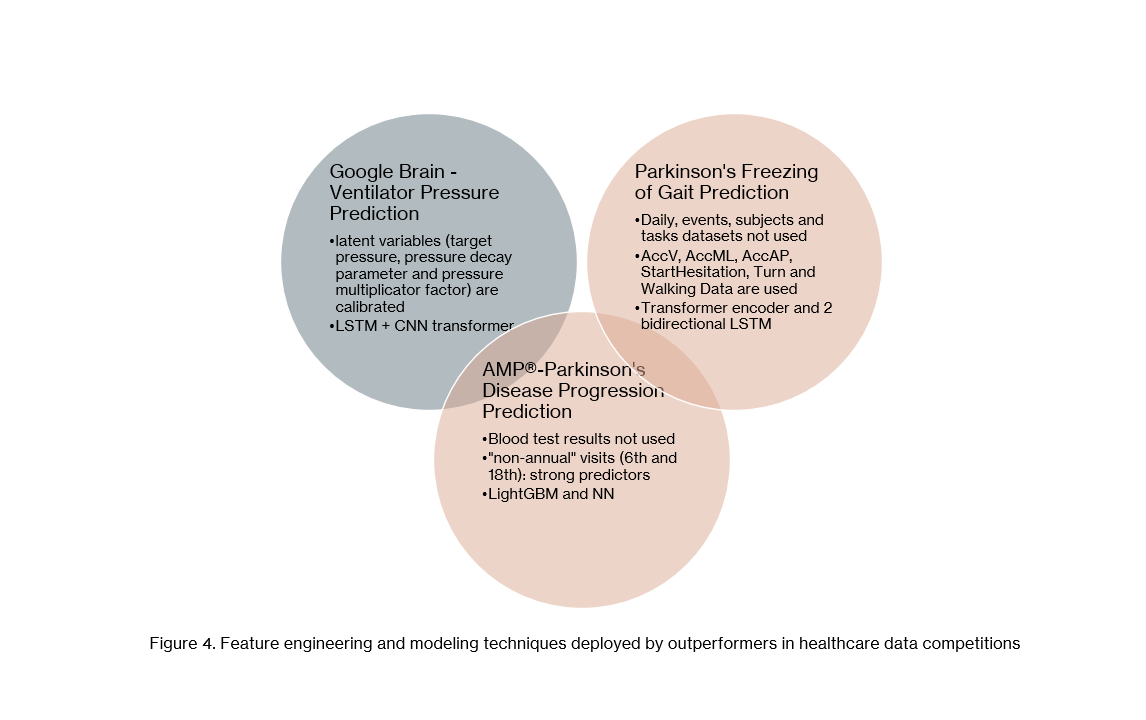

##### Section 4.2 Healthcare Data Modeling

In the "Google Brain - Ventilator Pressure Prediction" competition, a median ensemble of multiple folds of LSTM + CNN transformer is employed (11). Just like GRU, LSTM is another sequence model which incorporates previous observations when making predictions. A transformer consists of a encoder part and a decoder part, and both parts contain multiple multihead self-attention (MSA) layers. A multihead self-attention layer is similar to the attention structure, but involves estimation of more parameters such as query, key and value matrices (see 28). It is fascinating to see how state-of-the-art machine learning models are used to tackle challenges in healthcare data competitions. In the "AMP®-Parkinson's Disease Progression Prediction" competition, average of LightGBM and NN are used (13). LightGBM is configured as a classification problem with 87 target classes while NN is configured to be a regression model. Hyperparameters such as learning rate and hidden layer size are calibrated using leave-one-out CV due to the small training size and random effects caused by other forms of cross validation. In the other Parkinson Disease related competition "Parkinson's Freezing of Gait Prediction", transformer encoder and 2 bidirectional LSTM are applied (14). Final results are the weighted averages of the model output of the same structure with different hyperparameters. This is another example illustrating how modern machine learning models are applied to sequence data in this field enabling scientists make more accurate forecasts.

### Section 5. Nature Science Data Techniques

##### Section 5.1 Nature Science Data Feature Engineering Techniques

Switching to nature science data competitions, two competitions involving gravitational wave have been held in recent years. The first one is the "G2Net Gravitational Wave Detection" competition, where winners apply highpass filter 20Hz 1D convo to raw signal (15). They were able to generate their own noise and merger signals using PSD (power spectral densities) based on provided data by iteratively determining distribution parameters using neural networks once they realized the noise in the provided data was generated (16). In the winning strategy of the other related competition "G2Net Detecting Continuous Gravitational Waves", noise is normalized by root squared mean grouped by time-ID, and single-frequency noise is removed by masking anomalously large frequency bins (19). Also frequency dependence is removed by normalizing through the root squared mean within each frequency bin.

Some very interesting feature engineering techniques have been applied in the "Open Problems - Multimodal Single-Cell Integration" competition. Feature engineering there is divided into 2 parts: multiome and CITESeq (17). In the multiome part, input data preprocessing includes: 1. dividing tf-idf (chromatin accessibility) values by row-wise nonzero median value and performing dimension reduction using tSVD 2. replacing nonzero values by one and performing dimension reduction using tSVD. Then output from 1 and 2 is concatenated and input data also includes metadata (day and gender etc.). Dimension reduction techniques transform multi-column data into fewer columns which represent the directions in which the original data has the largest variances. This type of techniques proves to be essential when dealing with cell data which have a large number of columns. Target data preprocessing includes dividing RNA expression levels by row-wise nonzero median values, imputing values using tSVD (apply dimension reduction techniques and transform the data back before copying values to places where the orignal data was 0), and performing dimension reduction using tSVD again. In the CITEseq part, feature engineering includes selecting gene data which are highly correlated with target variable and imputing orignal data using tSVD before applying dimensionality reduction techniques again; target preprocessing also includes tSVD dimensionality reduction.

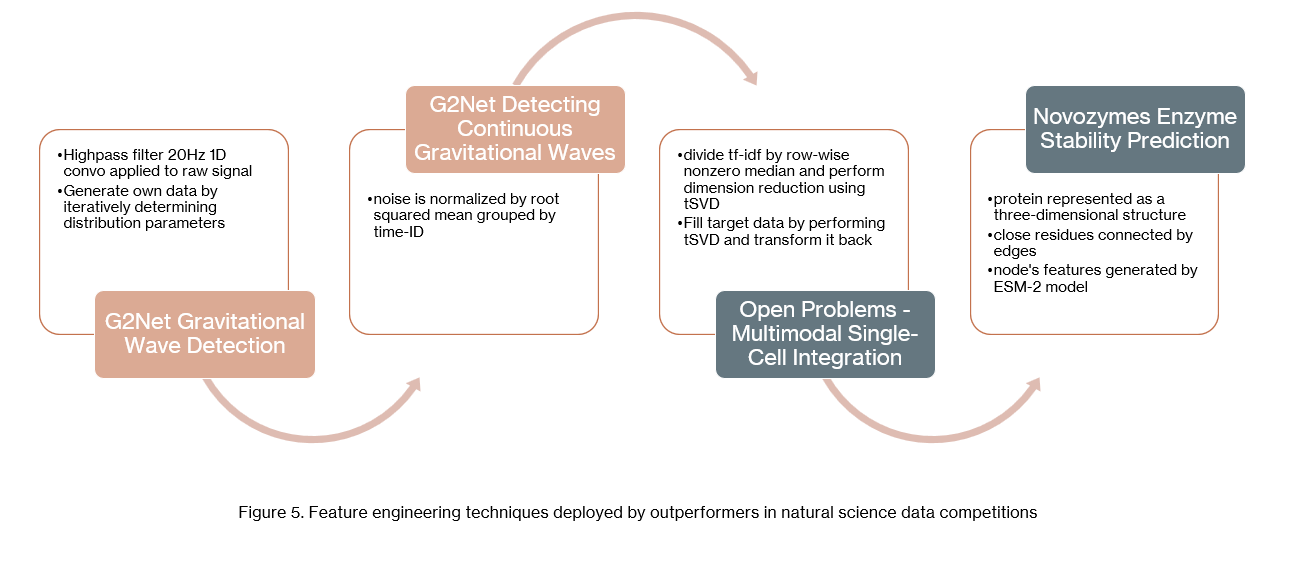

A novel feature engineering technique is applied in the "Novozymes Enzyme Stability Prediction" competition, where protein is represented as a three-dimensional structure created using PDB files and close residues are connected by edges (18). In this graph, each node's features are embedding vectors of wildtype and mutant sequences created by the ESM-2 model (pre-trained transformer protein language model, see 29).

##### Section 5.2 Natural Science Data Modeling Techniques

In the winning strategy of the "G2Net Gravitational Wave Detection" competition, CNN followed by batch normalization, sigmoid linear units and maxpool blocks is applied (15). SGD turns out to be a better optimizer than AdamW. Due to different noise distrbutions of detectors, a different conv1d is applied to each channel (Hanford, Livingston and Virgo). After concatenating the features, resnet34 (a pretrained convolutional neural network) is applied to produce the final output. In the related "G2Net Detecting Continuous Gravitational Waves" competition however, no machine learning technique is employed. Signal frequency and amplitude are extracted from the simulators, and Doppler shift frequency is subtracted for 4000 signal patterns (19). The data is weighted by the signal amplitude pattern and the maximum of weighted sums is taken among all the candidates (each sum is calculated by summing over 360 (frequencies) * 241 (slops) values). Weighting is based on a sinc kernel with a width of 8, and the winners stride 1/8 frequency bin to collect the signal.

In the winning strategy of the "Open Problems - Multimodal Single-Cell Integration" competition, hyperparameter optimization is performed with Optuna.  Final predictions are based on multiple folds of linear blocks (GELU(Gaussian Error Linear Unit)-Layer Norm-Dropout-Linear) with different seeds. Validation sets include only some batches (Day 4, 7 only, female only, male only etc.). For output postprocessing, output data is transformed back to the original space and multiplied with the median of the original data to ensure consistency with the original data. Until now, none of the modeling technques in those competitions involve any sequential machine learning models.

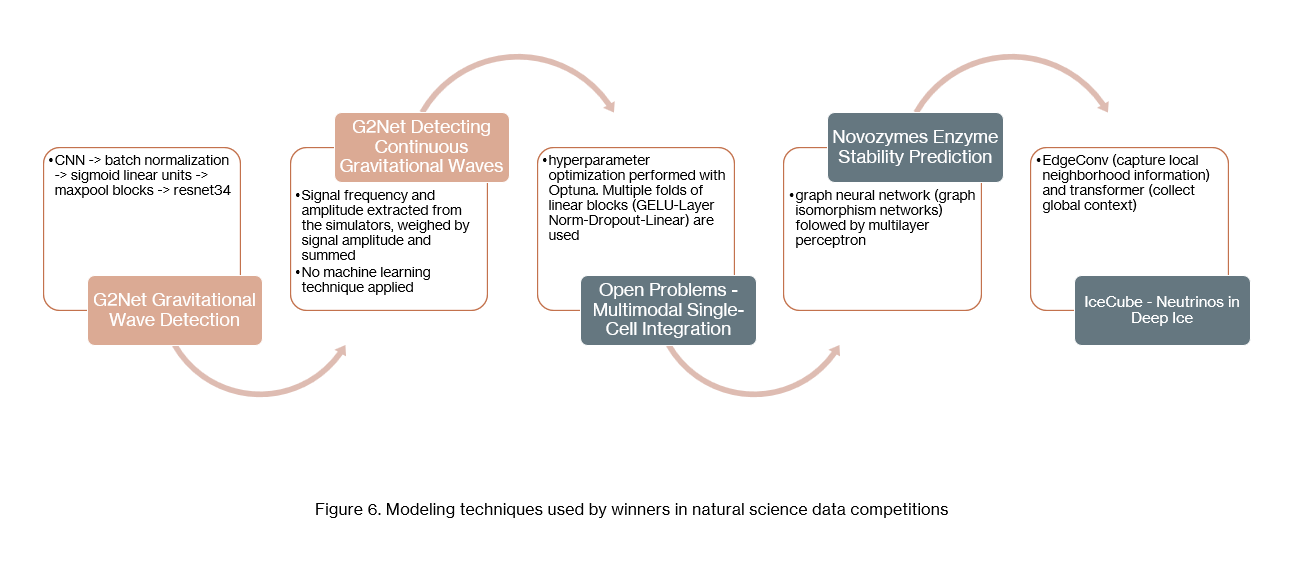

The winners of "Novozymes Enzyme Stability Prediction" apply graph neural network (graph isomorphism networks, see 30) followed by multilayer perceptron (18). In another competition involving natural science data "IceCube - Neutrinos in Deep Ice", EdgeConv (a model which generates edge features that describe relationships between points and their neighbors, see 31) is used by the winners to capture local neighborhood information, transformer is used to collect global context, and VMF is chosen as the loss function (20). Von Mises-Fisher Loss is a probabilitic loss over probability distribution of pre-trained word embeddings aiming at speeding up training processes (see 32). Data are grouped by their sequence lengths to reduce the training time when fed into transformers.

### Section 6. Recommendation System and Other Data Techniques

##### Section 6.1 Recommendataion System and Other Data Feature Engineering Techniques

Now we will discuss the last type of data competition in our report: recommendation system data. In recent years, we have seen that state-of-the-art language models are applied in some tabular data competitions. One competition which involves tabular data and also language models is the "Foursquare - Location Matching" competition. When choosing potential matching candidates, the novel text processing model BERT (Bidirectional Encoder Representation from Transformers, see 33) is applied by the winners to generate embeddings for store names, and together with location attributes (latitude, longitude), one is able to generate potential matching candidates (24). Also dimension reduction techniques such as svd are applied to embeddings. LightGBM is used to select features based on their importance in their strategy.

Talking about finding potential matching candidates, we will also discuss two competitions featuring recommendation systems. One of them is the "Otto - Multi-Objective Recommender System". In this competition, innovative features including visited article-ids during the session, co-visitation matrix which shows how often different articles are being visited together, article information (type, time of appearance, popularity etc.) and time between last article-id and second last article-id indicating how frequent events appear are used by the winners to select potential candidates (22). LightGBM are used to determine the feature importance and filter for important features. In addition, MLP and transformers are used to generate embeddings for the articles, which are also used as features. The second recommender system competition is the "Learning Equality - Curriculum Recommendations" competition. In the winning strategy of this competition, char 4gram TFIDF sparse vectors are created for each language to generate top 20 matches (25). TFIDF (Term Frequency - Inverse Document Frequency) is an improved version of bag of words, counting frequency of terms and number of documents containing certain terms. In addition, ensemble consisting of bert-base-multilingual-uncased, paraphrase-multilingual-mpnet-base-v2 and xlm-roberta-large (all pretrained transformer-based models, see 34, 35, 36) are applied to subject descriptions to generate another 20 top matches. Features including title, ancestor titles, content, type, description, topic attributes, content attributes and vector consine distance are used in the LightGBM model in choosing the final target. It is not surprising to see the frequent usage of language models in recommendation system data competitions, as descriptions and names require pre-trained models to generate embeddings to be used as features.

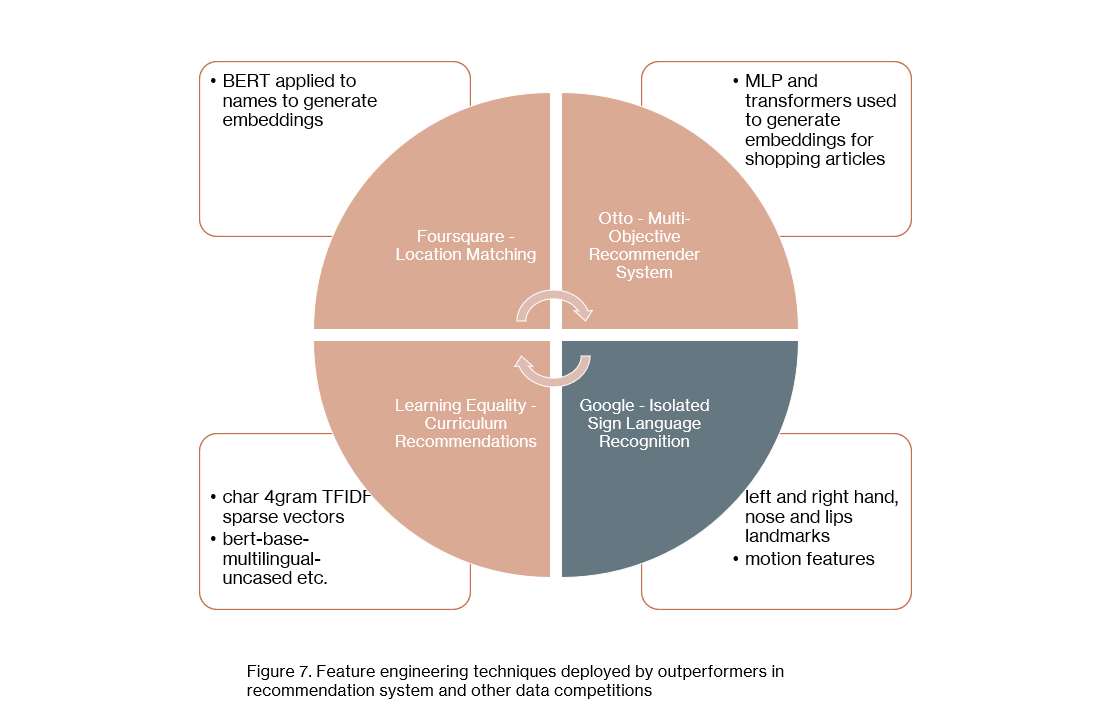

Another feature engineering technique we found interesting is applied in the recent competition "Google - Isolated Sign Language Rocognition", which is categorized as "other data" competition type in this report. In this competition, left and right hand, nose and lips landmarks are used as features by the winners (23). The positions of noses are used for normalization. In addtion, motion features (e.g positions[1:] - position[:-1]) are also used as features. The combination of those features simulate the temporal movements of different parts of the body and perfectly illustrate the indicated sign.

A competition which requires fewer machine learning techniques is the "Google Smartphone Decimeter Challenge 2022" competition. GNSS (global navigation satellite system) observation data and satelite orbit data are used as features by the winners. Velocity is estimated using pseudorange rate (Doppler) before outliers are removed (21). The values are then interpolated using Akima interpolation (a non-smoothing spline used to fit curves where the second derivative is changing rapidly) and then used as constraints when estimating positions. The positions are then estimated by optimizing a graph constructed using pseudorange corrected for bias components by base station, ADR time difference and the estimated velocity from the previous step, which all act as constraints, based on GTSAM (c++ library which implements smoothing and mapping (SAM) in robotics and vision using Factor Graphs and Bayes Networks, see 37) and M-estimators, which is the broad class of extremum estimators for which objective function is a sample average, e.g. maximum likelihood. The important learning from this competition is that the steps of estimating velocity and positions need to be separated.

##### Section 6.2 Recommendataion System and Other Data Modeling Techniques

Even though LightGBM belongs to a more traditional type of machine learning models, it is widely used in recommendation system data competitions. For instance, in the winning strategy of Foursquare - Location Matching competition, LightGBM is used in reducing number of potential matching candidates and filtering features based on their relative importance (24). Subsequently, an ensemble of Catboost, xlm-roberta-large and mdberta-v3-base (an enhanced version of BERT, see 38 and 39) is used to select the matching location. It is fascinating to see how state-of-the-art language models are used within an ensemble together with a gradient boosting methodology such as Catboost. The success of the ensemble demonstrates how well gradient boosting models can complement transformer-based models based on their distinct characteristics. LightGBM is also used in Otto - Multi-Objective Recommender System competition to filter for important features (22). Negative sampling plays also an important role for the training part in this competition to filter out wrong predictions. LightGBM plays a similar role in the "Learning Equality - Curriculum Recommendations" competition (25).

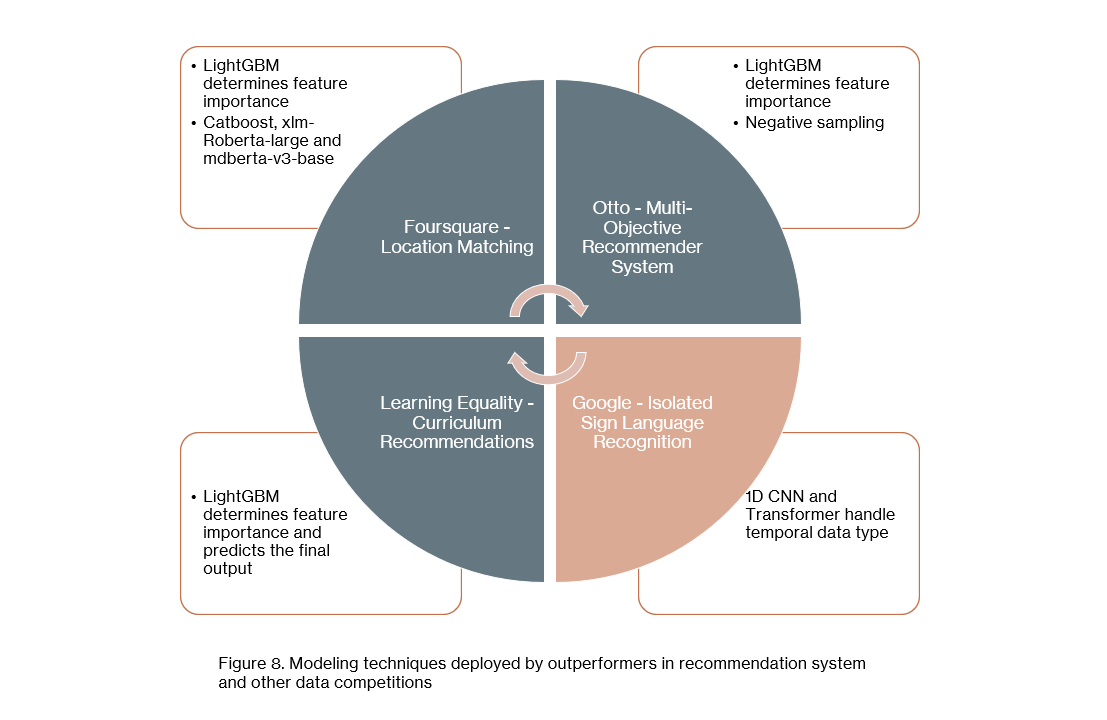

Unlike the winning strategies of recommender system competitions where LightGBM is essential, the winners of "Google - Isolated Sign Language Rocognition" apply 1D CNN and Transformer as the sign language involves temporal data type (23). In this competition, adversarial weight perturbation and high rate of dropout play a huge role in regularizing. Temporal (such as random masking) and spatial augmentation (flip, random cutout etc.) are used together with the optimizer RAdam to enhance the robustness of the model.

### Section 7. State of the Art: Transformer vs MLP Architecture for Time Series Data

##### Section 7.1 Transformer-based Models

After seeing how various models are applied to concrete datasets of different types in the competitions, now we pay attention to some state-of-the-art machine learning models which have not been applied by the winning strategies in the discussed competitions to add the last piece of the puzzle. It is worth noting that in the M5 competition held about 3 years ago, the best performing models are LightGBM and XGBoost followed by deep forecasting methods (49). This might explain the prevalent usage of LightGBM in recent competitions and why transformer-based models are not deployed in the winning strategies in finance, sports and recommendation data competitions. However, as we will see, significant improvements on model performance have been made on transformer-based models in the recent years. We will first discuss some novel transformer-based models and then switch to novel MLP-based models. In fact, some recent influential papers suggest MLP-based models outperform transformer-based models in time series forecasting. We would like to note that due to notebook's size constraint, the graphs for transformer based models cannot be included in the notebook unfortunately. <br/> <br/>

(40) discusses novel transformer-based models applied to time series. It divides such models in three categories: transformer-based innovations for forecasting, transformer-based innovations for anomaly detections and transformer-based innovations for classification. As most competitions in Kaggle focus on forecasting, we will discuss the forecasting part in this report. (40) starts with innovations related to interpretability. Interpretability has been always seen as a challenge for machine learning models. In the past 2 years, transformer-based models including temporal fusion transformers (41), ProTran (42) and SSDNet (43) are developed to enable explicit interpretation ability. ProTran and SSDNet aim at combining transformer with state space models. Also contributing to interpretability of transformer-based models, Koopman Neural Forecaster, which is developed by Google recently and has received much attention from the community, will be discussed in this report, even though it is not discussed in (40).<br/> <br/>

##### Koopman Neural Forecaster

The strength of Koopman Neural Forecaster is its interpretability and being robust against distribution shifts over time. Koopman Neural Forecaster (46) is based on Koopman theory which states that any nonlinear dynamic system can be approximated by an infinite-dimensional linear Koopman operator applied to the space of all possible measurement functions. To make this statement more understandable, it basically means that one applies non-linear functions (denoted as $G()$ meansurement functions in the paper, including polynomials, exponential functions, trigonometric and interaction functions) to the observed time series and the reconstruct the orginal series using $\phi ()$ which is to be trained by MLP ($x \approx\phi(G(v(x)))$, where $v()$ is also to be trained by MLP). Subsequently, to deal with distributional shifts, local (i.e. time window based) and global behaviors are represented by $K^l$ and $K^g$, which are matrices trained by single-headed transformer, and applied to the measurement functions $G(v(x))$. As the final ingredient, to take into account that distributional shift might occur within one single time window, a third matrix $K^c$ is learned through MLP to react to any prediction error in the lookback window and thus also adjust $K^l$ and $K^g$. Thus, the approximation is done via $\phi((K^g+K^l+K^c)G(v(x)))$. Koopman demonstrates good performance on non-stationary time series datasets including crypocurrency returns and sports player trajectory prediction, and via eigenvalues and eigenfunctions of Koopman operators one can generate interpretable insights.

##### Autoformer

After discussing a novel model which focuses on addressing shifting distributions over time, we will now discuss a model which relies on the time series similarity derived by series periodicity and focuses on leveraging autocorrelations embedded within the time series. It also refines long-term forecasts during the forecasting processes by calculating autocorrelations and decomposing intermediate results into trend and seasonal components continuously. Thus, this model, the Autoformer (48), tries to construct series-level connections instead of point-wise connections seen in other transformer-based models. Two novel block units within the Autoformer need further clarification. The first is the  Series-Decomp block, which essentially subtract the moving average values from the raw values to create the seasonal and trend processes. <br/><br/> 


The second one is the AutoCorrelation block, which essentially selects top $k$ autocorrelations of the time series among $\tau$ lags and calculates the weighted sum of the lagged time series weighted by the chosen autocorrelation coefficients. FFT (fast fourier transformation) is only used here to calculate the autocorrelations efficiently. In the decoder, one of the AutoCorrelation blocks (called encoder-decoder) inherits seasonal time series from the encoder, which serves here both as the "value" and "key" in self-attention setting, while the "query" comes from the preceding Series-Decomp block in the decoder. Autocorrelations are calculated based on the query and key in Autoformer, and the value is the input time series. All the other Autocorrelation blocks are called "inner Auto-Correlation" as they receive only one time series as input. The encoder here calculates seasonal information which is to be consumed by the decoder, and the decoder is responsible to produce the forecast which is a weighted sum of trend and seaonal component forecasts. (48) states that Autoformer outperforms self-attention in both efficiency and accuracy with 38% relative improvement on six benchmarks. Autoformer adapts to the change of autocorrelations, seasonal and trend components, just like Koopman Neural Forecaster incorporates local and global behavior by using $K^g$, $K^l$ and $K^c$.<br/><br/>

In (40), in order to test the robustness of various transformer-based models, authors increase the input length of the Autoformer and observe that the Autoformer does not perform as well when having longer input length. It performs the best with a input length of 96 compared to 192, 336 and 1440. However, it still outperforms the other models such as Informer, Reformer and LogFormer. When trying to increase the number of layers, the authors observe that the Autoformer performs the best with only 3 layers compared to 6, 12, 24 and 48 layers. It seems that increasing the number of layers doesn't contribute to enhancing the model performance in time series setting.

##### AirFormer

In the realm of spatio-temporal forecasting discussed in (40), one notable model AirFormer has been developed recently (44). Two innovative model structures are being used in this model: Dartboard Spatial MSA (DS-MSA) and Causal Temporal MSA (CT-MSA). In DS-MSA, for each location, one projects its surroundings into a dartboard distribution to obtain the keys and values, so that the number of keys is reduced to the number of regions to speed up computations within the transfomer. The projection is done via a project matrix, where an entry in the matrix denotes the likelihood that k-th station belongs to the region j. Subsequently, MSA is performed to learn spatial dependencies. In CT-MSA, two novel structures are being used: local window and temporal causality. "Local window" is based on the fact that nearby time steps are usually more likely to be correlated than further away slots, thus MSA is performed within non-overlapping windows to capture local dependencies before increasing the window size gradually in the subsequent blocks to capture dependencies between further away time steps. "Temporal causality" is performed by masking specific entries to preserve the temporal order of input data.

##### 7.2 MLP-based Models

##### Time-series Dense Encoder (TiDE)

Previously we discussed state-of-the-art transformer-based models. A recent paper from Google (45) suggests that as several transformer-based models have been outperformed by linear models in recent research, (45) introduces a MLP based encoder-decoder model, Time-series Dense Encoder (TiDE), which matches or outperforms prior approaches on popular forecasting benchmarks. As it deploys relatively simple structure, its speed is 5-10x faster than transformer-based model. In this model, $x$ denotes dynamic covariates of time series, $a$ denotes static attributes, and $y$ denotes the target variable. The encoder of the model includes the feature projections stage, which applies a residual block to $x$ (see Figure 9) and reduces its dimension. The residual block is an MLP with ReLU activation. Then the dense encoder concatenates the dimension-reduced $x$ with static attributes and observed target values before applying multiple residual blocks. Decoders include the dense decoder, which consists of several layers of residual blocks, and temporal decoder, which applies another residual block to the output of dense decoder and dimension-reduced $x$. Finally, one uses the output of temporal decoder and observed target values to produce the final predictions. The overall design is captured well in Figure 9.

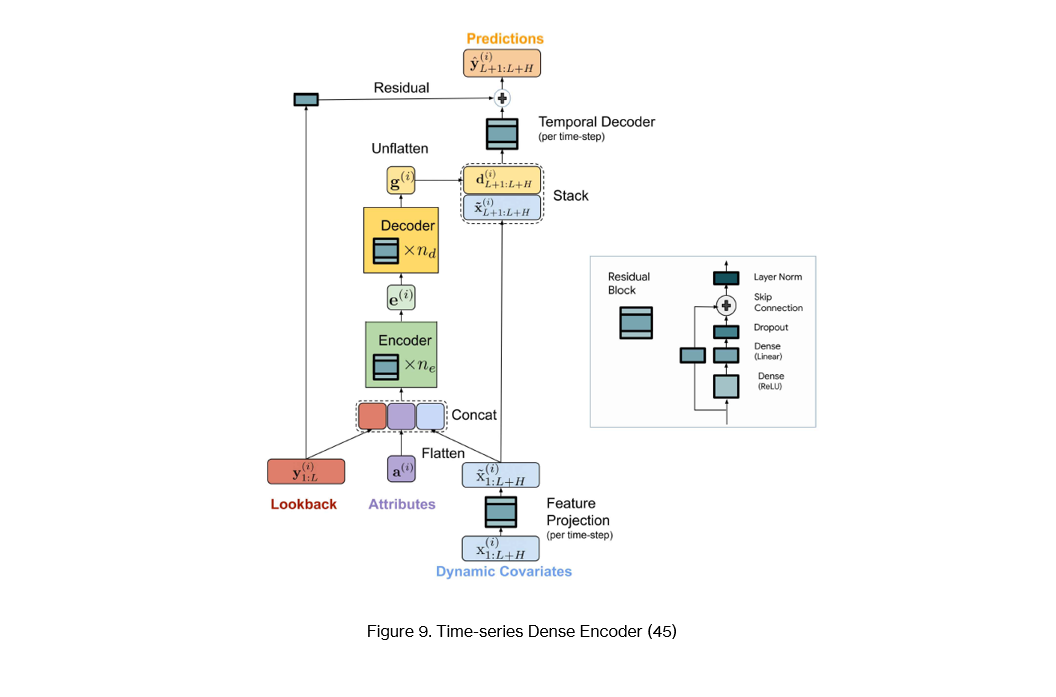

##### TSMixer

Last but not least, a recent paper from Google (47) argues that "data-dependent" functions, such as the gates in LSTM and attention layers in transformers, could lead to overfitting when target variable is not correlated with covariates and are not good in extracting temporal patterns. On the other hand, "time-dependent" models such as linear models are highly affective in modeling temporal patterns. Thus, the authors suggest applying MLPs in the time-domain and the feature-domain in an alternating manner, so that the time-dimension MLPs are shared across all of the features, while the feature-dimension MLPs are shared across all of the time steps. As Figure 10 illustrates, TSMixer consists of Time-mixing MLP, Feature-mixing MLP, Temporal Projection and Residual Connections. Time-mixing MLP models temporal patterns along the time-dimension. Transposed input is fed into MLP before being transposed back for further processing. Subsequently, the output is fed into Feature-mixing MLP to extract covariate information. Residual connection is also applied between time-mixing and feature-mixing steps to enable the learning of deeper architectures without any unnecessary time-mixing or feature-mixing operations. In the temporal projection step, the output of feature-mixing is transposed again and fed into another fully connected layer to learn temporal patterns, and the orignal input length m is mapped to the target output length n. TSMixer's performance is comparable to specialized state-of-the-art models and superior on the challenging M5 benchmark (a real-world retail dataset) compared to state-of-the-art alternatives.<br/><br/> 

The fact that transformer-based models are not deployed in the winning strategies in finance, sports and recommendation data competitions could be explained by the idea behind this paper, which is "data-dependent" functions are not good in extracting temporal patterns.

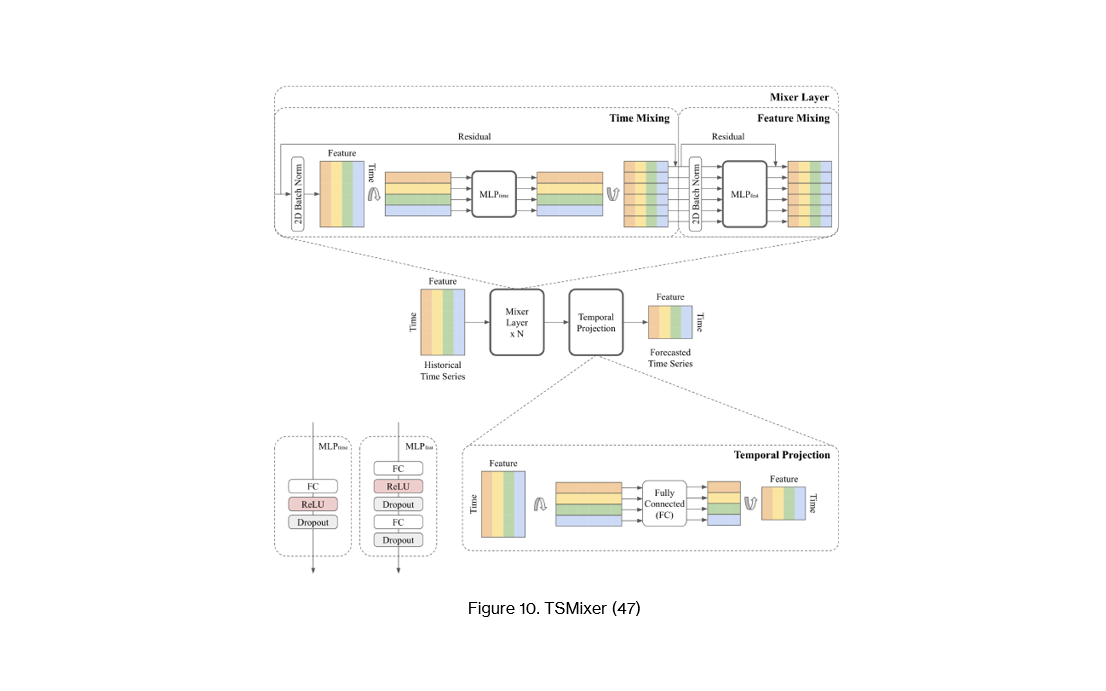

### Section 8. Conclusion

While tabular and time series data is a more traditional form of data, we have seen how state-of-the-art language and computer vision models are applied to such data in the fields of healthcare, natural science and recommendation systems. We also have seen very innovative feature engineering techniques being applied in recent competitions and various state-of-the-art machine learning models. In addition, we explored the reasons why sophisticated transformer-based models have not been applied in winning strategies in finance, sport or recommendation system data competitions. As we continue to learn what machine learning can benefit us as human beings, Kaggle stays as a platform fostering collaboration and knowledge transfer between different scientific fields and helping us stay up-to-date with the new developments in various areas. We all have learned so much from each other, and we hope that Kaggle will continue to enable efficient information transfer and help us learn about innovative applications of modern techniques applied to upcoming diverse and exciting challenges we will face.

### References

[1]. NYANP, "Optiver Realized Volatility Prediction" - 1st Place Solution Nearest Neighbors, 11.1.2022 https://www.kaggle.com/c/27233/discussion/274970<br/>
<br/>
[2]. NATHANIEL MADDUX, "G-Research Crypto Forecasting" - 2nd Place Solution, 2022 https://www.kaggle.com/c/30894/discussion/323098 <br/>
<br/>
[3]. SUGGHI "G-Research Crypto Forecasting" - 3rd Place Solution, 2022 https://www.kaggle.com/c/30894/discussion/323703 <br/> 
<br/>
[4]. YUUNIEE "Ubiquant Market Prediction" - [1st Place Solution] - Our Betting Strategy 2022 https://www.kaggle.com/c/32053/discussion/338220 <br/>
<br/>
[5]. FLATY "JPX Tokyo Stock Exchange Prediction" - 4th Place Solution 10.2022 https://www.kaggle.com/c/34349/discussion/359151 <br/>
<br/>
[6]. DAISHU "American Express - Default Prediction" - 1st solution(update github code) 2022 https://www.kaggle.com/c/35332/discussion/348111 <br/>
<br/>
[7]. KONSTANTIN YAKOVLEV "American Express - Default Prediction" - 2nd place solution - team JuneHomes (writeup), 2022 https://www.kaggle.com/c/35332/discussion/347637 <br/>
<br/>
[8]. PH0921 "MLB Player Digital Engagement Forecasting" - 1st place solution, 2021 https://www.kaggle.com/c/27783/discussion/274255 <br/>
[9]. KOKI ANDO "March Machine Learning Mania 2022 - Women's" - 1st place solution/approach, 2022 https://www.kaggle.com/c/34542/discussion/317817 <br/>
<br/>
[10]. RUSTYB "March Machine Learning Mania 2023" - 1st Place Submission - Another victory for raddars code, 4.2023 https://www.kaggle.com/c/46801/discussion/399553 <br/>
<br/>
[11]. GILLES VANDEWIELE "Google Brain - Ventilator Pressure Prediction" - [#1 Solution] The code, 2021 https://www.kaggle.com/c/29594/discussion/285965 <br/>
<br/>
[12]. AMBROSM "Google Brain - Ventilator Pressure Prediction" #2 Solution: The inverse of a PID controller, 2021 https://www.kaggle.com/c/29594/discussion/285283 <br/>
<br/>
[13]. DOTT "AMP®-Parkinson's Disease Progression Prediction" - 1st Place Solution 5.2023 https://www.kaggle.com/c/37794/discussion/411505 <br/>
<br/>
[14]. BAURZHAN URAZALINOV "Parkinson's Freezing of Gait Prediction" - 1st place solution: transformer and acceleration data, 6.2023 https://www.kaggle.com/c/41880/discussion/416026 <br/>
<br/>
[15]. SELIM SEFERBEKOV "G2Net Gravitational Wave Detection" - Top 1 solution: Deep Learning part, 2021 https://www.kaggle.com/c/23249/discussion/275476 <br/>
<br/>
[16]. DENIS KANONIK "G2Net Gravitational Wave Detection" Top 1 solution: DSP part, 2021 https://www.kaggle.com/c/g2net-gravitational-wave-detection/discussion/275507 <br/>
<br/>
[17]. SHUJI SUZUKI "Open Problems - Multimodal Single-Cell Integration" - 1st Place Solution Summary 11.2022 https://www.kaggle.com/c/38128/discussion/366961 <br/>
<br/>
[18]. EGGPLANCK "Novozymes Enzyme Stability Prediction" - 1st place solution - Protein as a Graph 1.2023 https://www.kaggle.com/c/37190/discussion/376371 <br/>
<br/>
[19]. JUN KODA "G2Net Detecting Continuous Gravitational Waves" - 1st place solution: Summing the power with GPU, 1.2023 https://www.kaggle.com/c/37077/discussion/375910 <br/>
<br/>
[20]. TITO "IceCube - Neutrinos in Deep Ice" - 1st Place Solution, 4.2023 https://www.kaggle.com/c/38257/discussion/402976 <br/>
<br/>
[21]. TARO "Google Smartphone Decimeter Challenge 2022" - 1st Place Solution, 2022 https://www.kaggle.com/c/35779/discussion/341111<br/>
<br/>
[22]. MRKMAKR "OTTO – Multi-Objective Recommender System" - 1st place solution, 2.2023 https://www.kaggle.com/c/38760/discussion/384022<br/>
<br/>
[23]. HOYSO48 "Google - Isolated Sign Language Recognition" - 1st place solution - 1DCNN combined with Transformer, 5.2023 https://www.kaggle.com/c/46105/discussion/406684 <br/>
<br/>
[24]. TAKOI "Foursquare - Location Matching" - 1st place solution, 2022 https://www.kaggle.com/c/35476/discussion/336055 <br/>
<br/>
[25]. AHMET ERDEM "Learning Equality - Curriculum Recommendations" - 1st Place Solution, 3.2023 https://www.kaggle.com/c/39585/discussion/394812 <br/>
<br/>
[26]. S. Arik, T. Pfister "TabNet: Attentive Interpretable Tabular Learning" 20.Aug.2019 https://arxiv.org/abs/1908.07442<br/>
<br/>
[27]. J. Alammar "Visualizing A Neural Machine Translation Model (Mechanics of Seq2seq Models With Attention)", 25.5.2018 https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/<br/>
<br/>
[28]. J. Alammar "The Illustrated Transformer", 27.6.2018 http://jalammar.github.io/illustrated-transformer/<br/>
<br/>
[29]. ESM https://huggingface.co/docs/transformers/model_doc/esm<br/>
<br/>
[30]. K. Xu, W. Hu, J. Leskovec, S. Jegelka "How Powerful are Graph Neural Networks?", 22.2.2019 https://arxiv.org/abs/1810.00826v3 <br/>
<br/>
[31]. Y. Wang, Y. Sun, Z. Liu, S. Sarma, M. Bronstein, J. Solomon "Dynamic Graph CNN for Learning on Point Clouds", 11.6.2019 https://arxiv.org/abs/1801.07829<br/>
<br/>
[32]. S. Kumar, Y. Tsvetkov "Von Mises-Fisher Loss for Training Sequence to Sequence Models with Continuous Outputs", 22.3.2019 https://arxiv.org/abs/1812.04616<br/>
<br/>

[33]. J. Devlin, M. Chang, K. Lee, K. Toutanova "BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding", 5.24.2019 https://arxiv.org/abs/1810.04805<br/>
<br/>
[34]. bert-base-multilingual-uncased https://huggingface.co/bert-base-multilingual-uncased<br/>
<br/>
[35]. N. Reimers, I. Gurevych "Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks", 27.8.2019 https://arxiv.org/abs/1908.10084 paraphrase-multilingual-mpnet-base-v2 https://huggingface.co/sentence-transformers/paraphrase-multilingual-mpnet-base-v2<br/>
<br/>
[36]. A. Conneau, K. Khandelwal, N. Goyal, V. Chaudhary, G. Wenzek, F. Guzmán, E. Grave, M. Ott, L. Zettlemoyer, V. Stoyanov "Unsupervised Cross-lingual Representation Learning at Scale", 8.4.2020 https://arxiv.org/abs/1911.02116 xlm-roberta-large https://huggingface.co/xlm-roberta-large<br/>
<br/>
[37]. GTSAM (Georgia Tech Smoothing and Mapping Library) https://github.com/borglab/gtsam<br/>
<br/>
[38]. P. He, J. Gao, W. Chen "DeBERTaV3: Improving DeBERTa using ELECTRA-Style Pre-Training with Gradient-Disentangled Embedding Sharing", 24.3.2023 https://arxiv.org/abs/2111.09543 deberta-v3-base https://huggingface.co/microsoft/deberta-v3-base<br/>
<br/>
[39]. P. He, X. Liu, J. Gao, W. Chen "DeBERTa: Decoding-enhanced BERT with Disentangled Attention", 6.10.2021 https://arxiv.org/abs/2006.03654<br/>
<br/>
[40]. Q. Wen, T. Zhou, C. Zhang, W. Chen, Z. Ma, J. Yan, L. Sun "Transformers in Time Series: A Survey", 11.5.2023 https://arxiv.org/abs/2202.07125<br/>
<br/>
[41]. B. Lim, S. Arik, N. Loeff, T. Pfister "Temporal Fusion Transformers for Interpretable Multi-horizon Time Series Forecasting", International Journal of Forecasting, 37(4):1748–1764, 2021 <br/>
<br/>
[42]. B. Tang and D. Matteson "Probabilistic
transformer for time series analysis" In NeurIPS, 2021.<br/>
<br/>
[43]. Y. Lin, I. Koprinska, and M. Rana
"SSDNet: State space decomposition neural network for time series
forecasting" In ICDM, 2021.<br/>
<br/>
[44]. Y. Liang, Yu. Xia, S. Ke, Y. Wang, Q. Wen, J. Zhang, Y. Zheng, R. Zimmermann "AirFormer: Predicting Nationwide Air Quality in China with Transformers", 29.11.2022 https://arxiv.org/abs/2211.15979 <br/>
<br/>
[45]. A. Das, W. Kong, A. Leach, S. Mathur, R. Sen, R. Yu "Long-term Forecasting with TiDE: Time-series Dense Encoder", 27.4.2023 https://arxiv.org/abs/2304.08424 <br/>
<br/>
[46]. R. Wang, Y. Dong, S. Arik, R. Yu "Koopman Neural Forecaster for Time Series with Temporal Distribution Shifts",  28.2.2023 https://arxiv.org/abs/2210.03675<br/>
<br/>
[47]. S. Chen, C. Li, N. Yoder, S. Arik, T. Pfister "TSMixer: An all-MLP Architecture for Time Series Forecasting", 22.6.2023 https://arxiv.org/abs/2303.06053<br/>
<br/>
[48]. H. Wu, J. Xu, J. Wang, M. Long "Autoformer: Decomposition Transformers with Auto-Correlation for Long-Term Series Forecasting", 7.1.2022 https://arxiv.org/abs/2106.13008 <br/>
<br/>
[49]. S. Makridakis, E. Spiliotis, V. Assimakopoulos, Z. Chen, A. Gaba, I. Tsetlin, R. Winkler "The M5 uncertainty competition: Results, findings and conclusions", International Journal of Forecasting, 38(4): 1365-1385, 2022 <br/>
<br/>

### Acknowledgement

First of all, we would like to thank Kaggle for hosting this competition. Kaggle gave us a bit extra motivation to go through all the competitions in the past two years and figure out what the outperformers have been doing to succeed in various competitions. It is also very fascinating to learn about the state-of-the-art models by reading all these newly published papers. In addition, Kaggle asked us to comment on other participants' reports and we really appreciate that, because we have learned so much from other reports, such as those of ORERE ISRAEL and MILES. Finally, we really appreciate the comments from Bharat SHARMA1998 and Soham Jangra. Kaggle is a place for us all to collaborate and learn from each other. We definitely have learned a lot from other participants. This competition has been a great experience for us. So thank you!